In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [48]:
data = pd.read_csv('bike-sharing-dataset.csv')
data['date_time'] = pd.to_datetime(data['date_time'])
data['users'] = data['users'].interpolate()

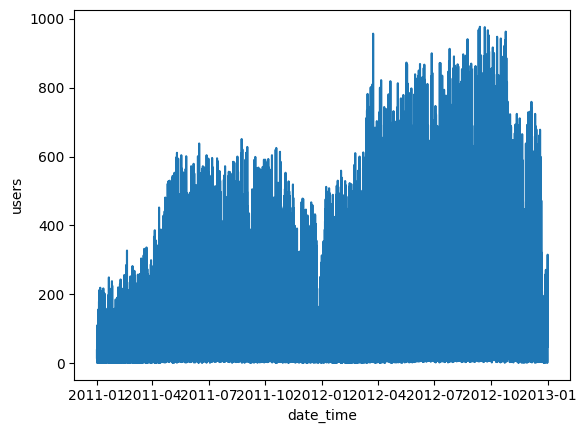

In [ ]:
# fig, ax = plt.subplots()
# ax.plot(data['date_time'], data['users'])
# ax.set_xlabel('date_time')
# ax.set_ylabel('users')
# plt.show()

In [50]:
def create_ts_data (data, window_size):
    i=1
    while i< window_size:
        data['users_{}'.format(i)] = data['users'].shift(-i)
        i += 1
    data['target'] = data['users'].shift(-i)
    data = data.dropna(axis =0)
    return data

window_size=5
data = create_ts_data (data, window_size)

In [51]:
train_ratio =0.8

x = data.drop(['target', 'date_time'], axis=1)
y = data['target']

num_samples = len(data)
x_train = x[:int(num_samples*train_ratio)]
y_train = y[:int(num_samples*train_ratio)]

x_test = x[int(num_samples*train_ratio):]
y_test = y[int(num_samples*train_ratio):]

In [66]:
preprocesser = ColumnTransformer(transformers=[
    ('holiday_feature', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), ['holiday']),
    ('workingday_feature', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1), ['workingday']),
    ('weather_feature', OneHotEncoder(), ['weather']),
    ('num_feature', StandardScaler(), ['temp', 'atemp', 'hum', 'windspeed', 'month', 'hour', 'weekday', 'users'] + ['users_{}'.format(i) for i in range(1,window_size)])
])

In [67]:
model = Pipeline(steps=[
    ('pre_processer', preprocesser),
    ('random', RandomForestRegressor(random_state=100))
])

model.fit(x_train, y_train)

y_predict = model.predict(x_test)

print(r2_score(y_test, y_predict))
print(mean_absolute_error(y_test, y_predict))
print(mean_squared_error(y_test, y_predict))
print(root_mean_squared_error(y_test, y_predict))

0.9468086769978841
30.955362029646523
2580.06683241163
50.794358273450314
